# Detection of Pneumonia from Chest X-Ray Images - Business Case Study - Tensorflow 2.0.0
---
Author: Bhaveshkumar Thaker

---

![Pneumonia Image](https://marlin-prod.literatumonline.com/cms/attachment/122c2ed9-1657-4dee-85e9-1f3fa1b5473f/figs6_lrg.jpg)

The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal).

## Connect Google Drive & Install Required Libraries

In [1]:
root_dir = ''
try:
    from google.colab import drive, files
    drive.mount('/content/drive')
    root_dir = '/content/drive/My Drive/Colab Notebooks/tensorflow-2-projects/'

    # To upload kaggle.json to mounted directory
    # files.upload();

    # Create directory for kaggle.json key file and copy file
    !mkdir -p ~/.kaggle
    # In my case, 'Colab Notebooks' directory already contains my kaggle.json
    !cp '{root_dir}../kaggle.json' ~/.kaggle/

    # Change the permission
    !chmod 600 ~/.kaggle/kaggle.json
    
    # Install the require libraries
    # !pip install kaggle
    !pip install tensorflow-gpu
except:
    print('No GOOGLE DRIVE connection. Using local dataset(s).')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 380.8MB 48kB/s 
     |████████████████████████████████| 450kB 40.6MB/s 
     |████████████████████████████████| 3.8MB 35.5MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 w

## Download Kaggle Dataset

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:48<00:00, 43.0MB/s]
100% 2.29G/2.29G [00:48<00:00, 51.2MB/s]


## Extract Dataset Files

In [3]:
import os.path
from zipfile import ZipFile

file_name = 'chest-xray-pneumonia.zip'

if os.path.exists('chest_xray') :
    print('Zip file is extracted already')
else :
    print('Extracting the Zip file...')
    with ZipFile(file_name, 'r') as zip:
        zip.extractall()
        zip.close()
        print('Zip file extracted successfully')

Extracting the Zip file...
Zip file extracted successfully


## Import Libraries

In [0]:
import os, sys, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from PIL import Image

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

In [5]:
print(tf.version.VERSION)
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

2.0.0
GPU is available


In [6]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('seaborn')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize' : (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(palette = list(colors.values()));

<Figure size 1008x792 with 0 Axes>

### Printing bold, colored, etc. text

`print('\x1b[1;31m'+'Hello world'+'\x1b[0m')`

**Text styling**

*	1 Increased intensity (it operates on highlight and text simultaneously in my case)
*	3 Itallic
*	4 Underline

**Text colors**

*	30 Black text
*	31 Dark Red text
*	32 Dark Green text
*	33 Red text
*	34 Dark blue text
*	35 Purple text
*	36 Blue text
*	37 Gray text

**Bright text colors**

*	1;30 Gray text (Bright black)
*	1;31 Orange text (Bright red)
*	1;32 Bright Green text
*	1;33 Bright Yellow text
*	1;34 Bright Blue text
*	1;35 Bright Purple text
*	1;36 Bright Cyan text
*	1;37 White text (Bright gray)

**Background colors (i.e. highlights)**

*	40 Black highlight
*	41 Dark Red highlight
*	42 Dark Green highlight
*	43 Red highlight
*	44 Dark blue highlight
*	45 Purple highlight
*	46 Blue highlight
*	47 Gray highlight

## Display Images from Dataset


==================== PNEUMONIA ====================



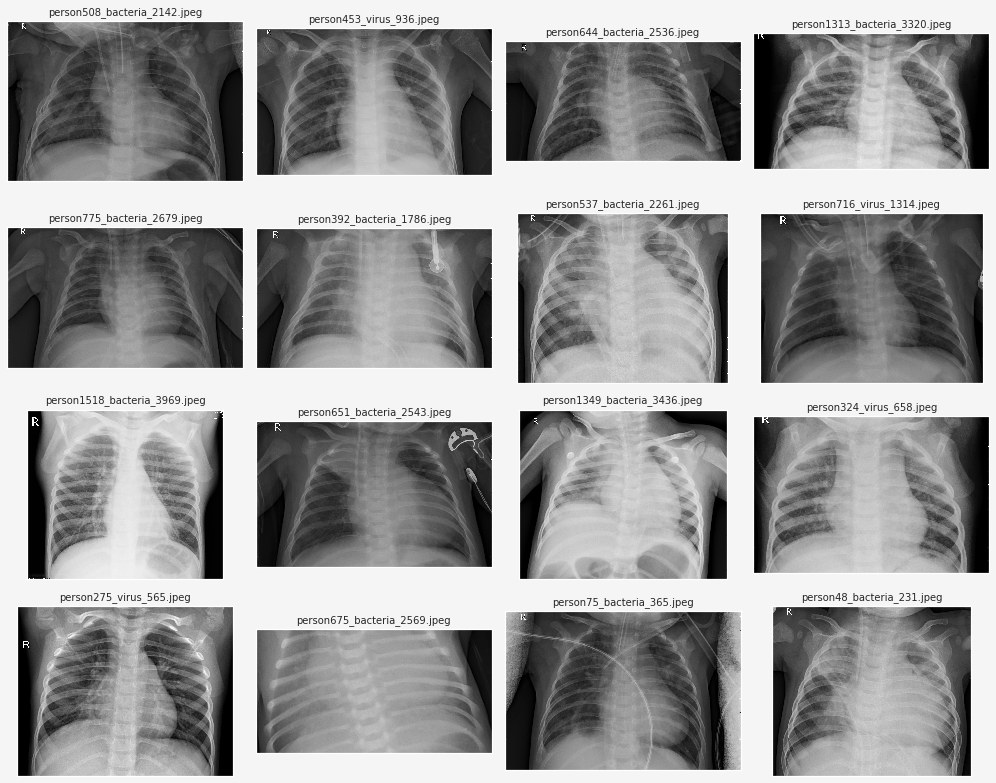


==================== NORMAL ====================



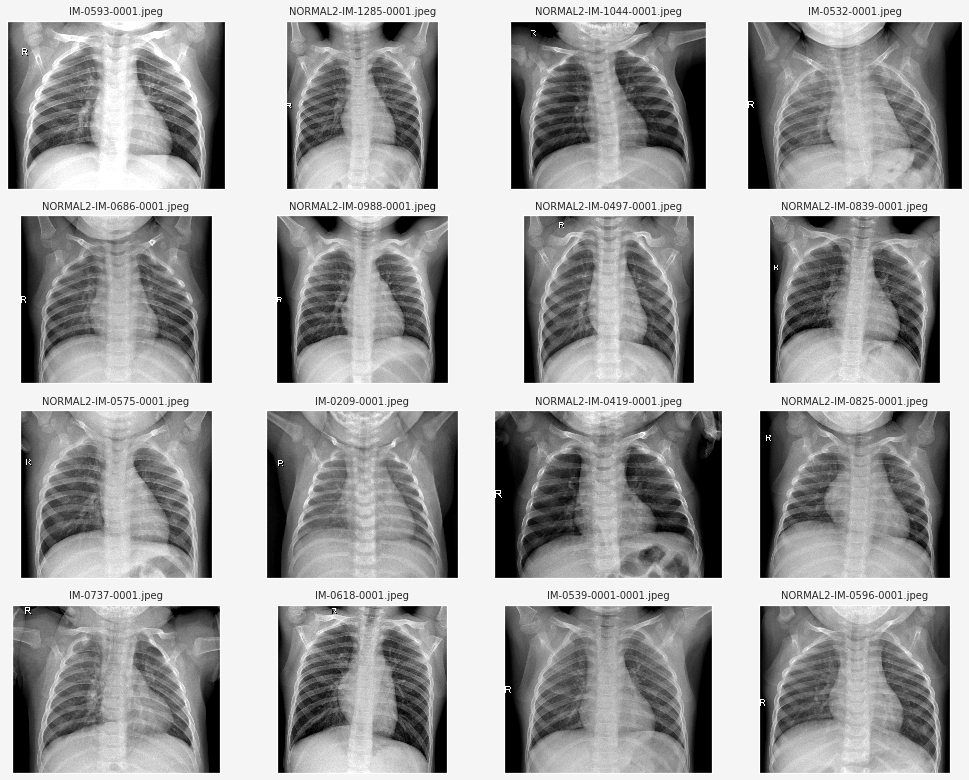

In [7]:
no_of_images = 4
path = 'chest_xray/train'

directories = os.listdir(path)

for dir in directories:
    files = os.listdir(path + os.sep + dir)
    for i in range(no_of_images * no_of_images):
        img = Image.open(path + os.sep + dir + os.sep + files[i])
        imgarr = np.asarray(img)
        img.close()

        plt.subplot(no_of_images, no_of_images, i+1)
        plt.imshow(X=imgarr, cmap=plt.cm.gray)
        plt.title(files[i], fontsize=10)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
    print('\x1b[1;37;40m'+ '\n==================== ' + dir + ' ====================\n' +'\x1b[0m')
    plt.tight_layout()
    plt.show();


==================== PNEUMONIA ====================



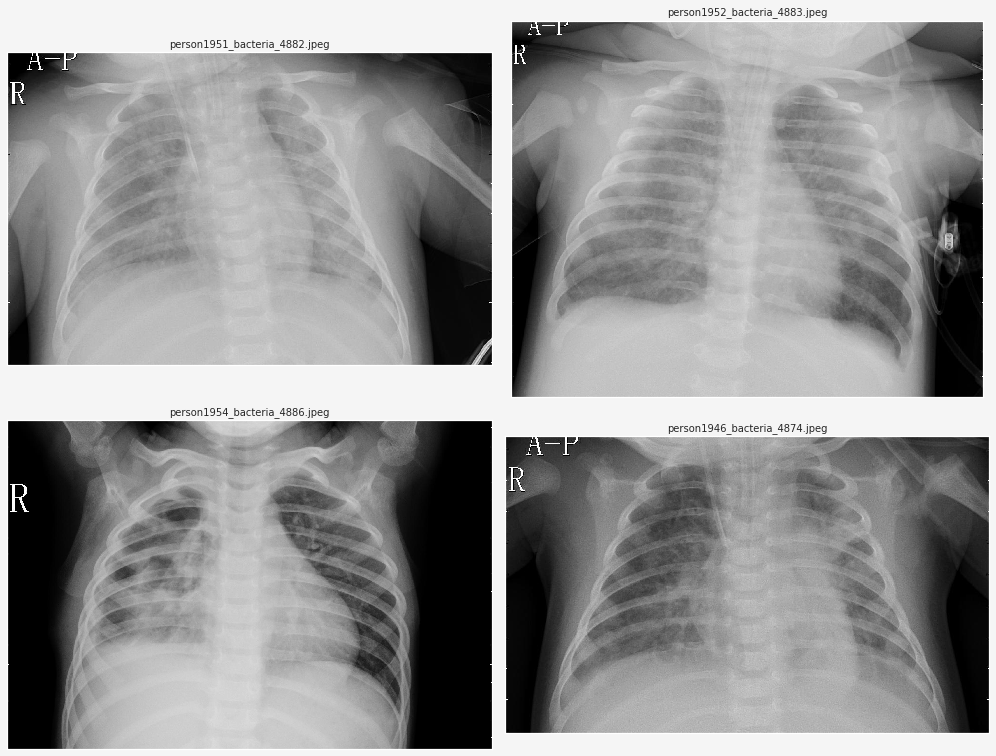


==================== NORMAL ====================



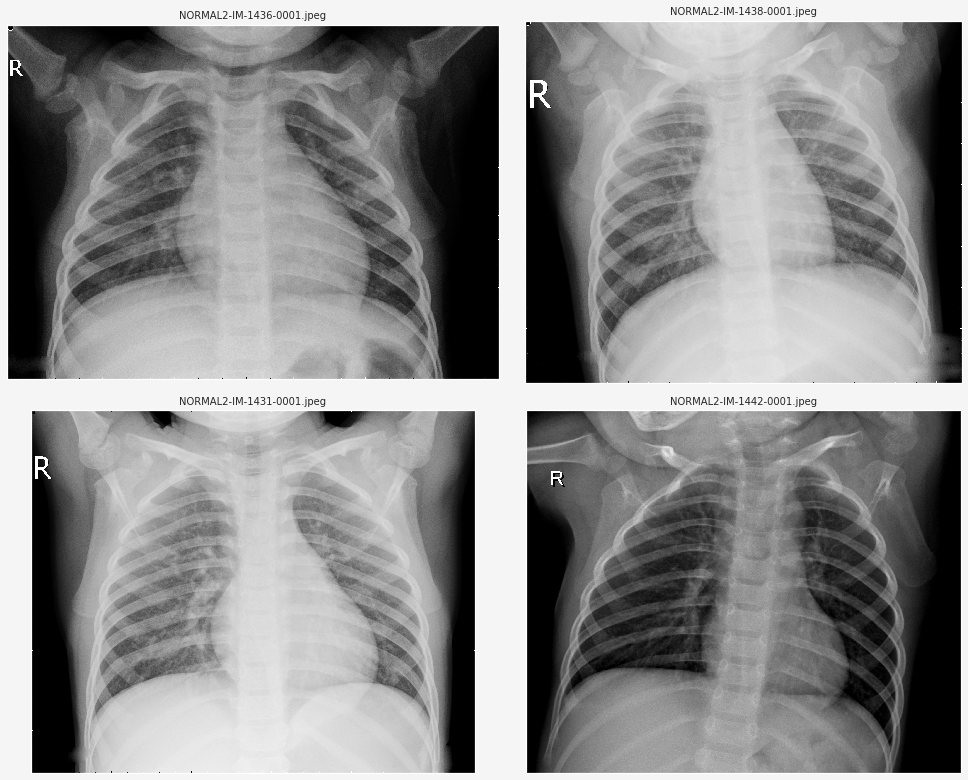

In [8]:
no_of_images = 2
path = 'chest_xray/val'

directories = os.listdir(path)

for dir in directories:
    files = os.listdir(path + os.sep + dir)
    for i in range(no_of_images * no_of_images):
        img = Image.open(path + os.sep + dir + os.sep + files[i])
        imgarr = np.asarray(img)
        img.close()

        plt.subplot(no_of_images, no_of_images, i+1)
        plt.imshow(X=imgarr, cmap=plt.cm.gray)
        plt.title(files[i], fontsize=10)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
    print('\x1b[1;37;40m'+ '\n==================== ' + dir + ' ====================\n' +'\x1b[0m')
    plt.tight_layout()
    plt.show();


==================== PNEUMONIA ====================



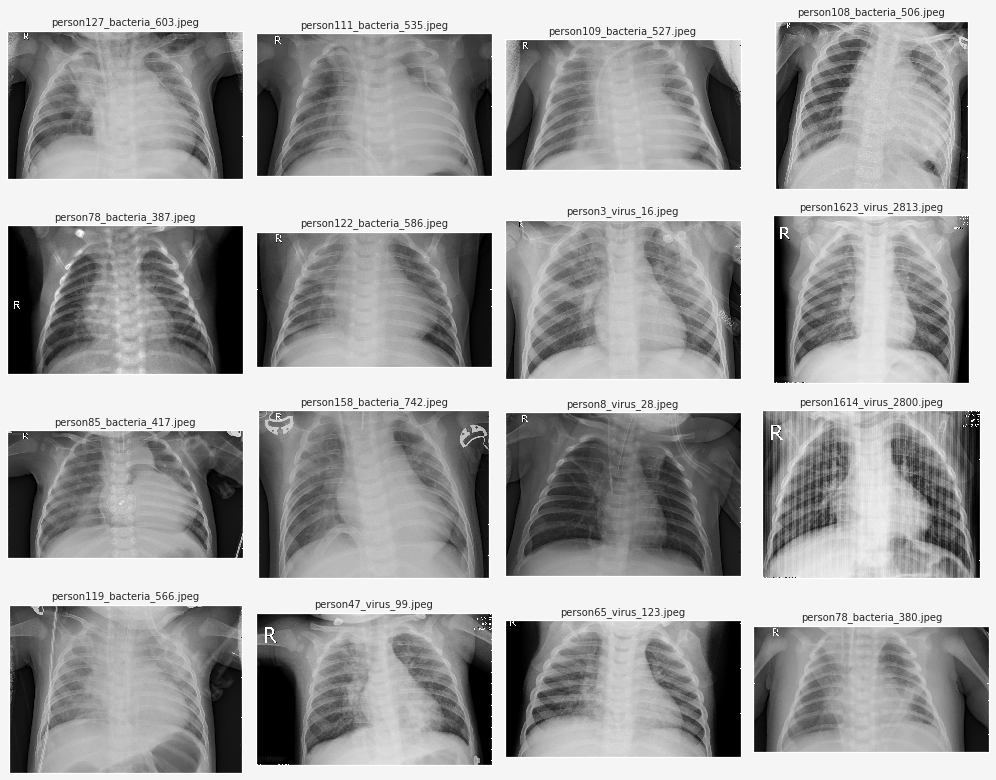


==================== NORMAL ====================



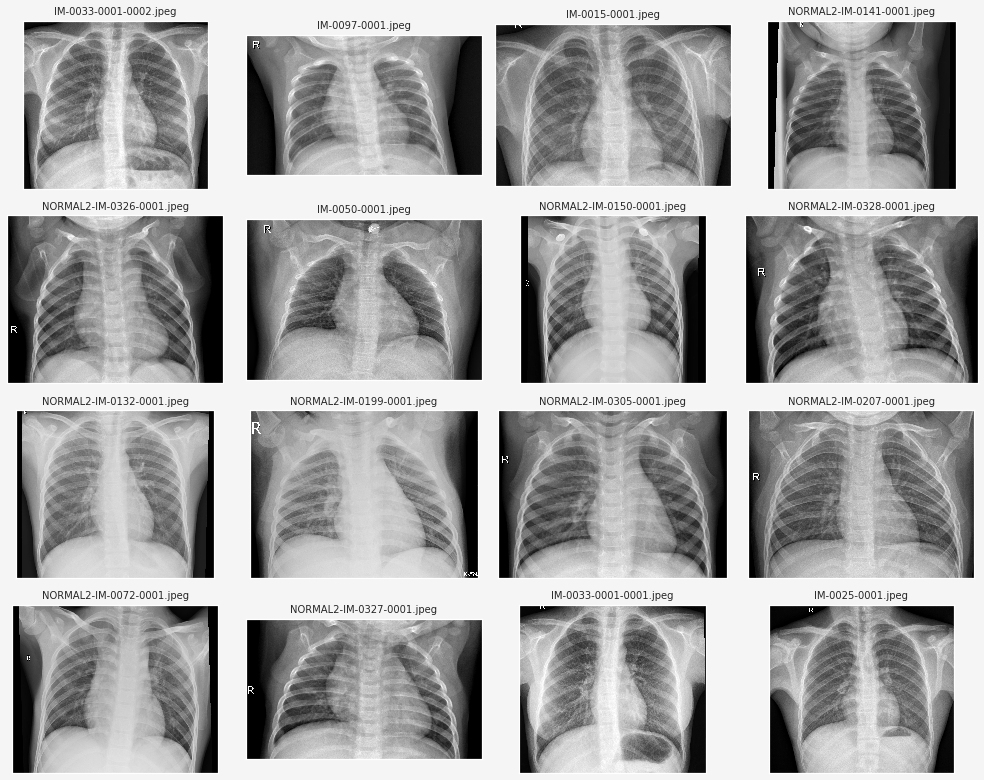

In [9]:
no_of_images = 4
path = 'chest_xray/test'

directories = os.listdir(path)

for dir in directories:
    files = os.listdir(path + os.sep + dir)
    for i in range(no_of_images * no_of_images):
        img = Image.open(path + os.sep + dir + os.sep + files[i])
        imgarr = np.asarray(img)
        img.close()

        plt.subplot(no_of_images, no_of_images, i+1)
        plt.imshow(X=imgarr, cmap=plt.cm.gray)
        plt.title(files[i], fontsize=10)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
    print('\x1b[1;37;40m'+ '\n==================== ' + dir + ' ====================\n' +'\x1b[0m')
    plt.tight_layout()
    plt.show();

## Display Image Dimensions

In [10]:
path = 'chest_xray/test'

for root, dirs, files in os.walk(path, topdown=True):
    for imgfile in files:
        try:
            img = Image.open(os.path.join(root, imgfile))
            img2arr = np.asarray(img, dtype=np.float32)
            print('{}: Shape of image {} is {}'.format(os.path.basename(root), imgfile, img2arr.shape))
        except:
            print('Bad file: ' + os.path.join(root, imgfile))
        
        # checking dimensions of only 1 file each from folder
        break;

PNEUMONIA: Shape of image person127_bacteria_603.jpeg is (648, 1032)
NORMAL: Shape of image IM-0033-0001-0002.jpeg is (1836, 2024)


## Data curation

In [0]:
image_size = 224
allpaths = ['chest_xray/train', 'chest_xray/val', 'chest_xray/test']
category = {'NORMAL' : 0, 'PNEUMONIA': 1}

In [12]:
for path in allpaths :
    total_valid_images_at_path = 0
    for root, dir, files in os.walk(path, topdown=True) :
        for imgfile in files :
            img = Image.open( os.path.join(root, imgfile) )
            #img = img.resize(size = (image_size, image_size))
            img2arr = np.array(img, dtype=np.float32) / 255.0
            img.close()
            if len(img2arr.shape) == 2:
                total_valid_images_at_path = total_valid_images_at_path + 1
    
    print('Total valid files at "{}" are: {}'.format(path, str(total_valid_images_at_path)))
    if path.endswith('train') :
        train_feature = np.ndarray(shape = (total_valid_images_at_path, image_size, image_size), dtype=np.float32)
        train_target = np.ndarray(shape = (total_valid_images_at_path, 1), dtype = np.int)
    elif path.endswith('val') :
        val_feature = np.ndarray(shape = (total_valid_images_at_path, image_size, image_size), dtype = np.float32)
        val_target = np.ndarray(shape = (total_valid_images_at_path, 1), dtype=np.int)
    elif path.endswith('test') :
        test_feature = np.ndarray(shape = (total_valid_images_at_path, image_size, image_size), dtype = np.float32)
        test_target = np.ndarray(shape = (total_valid_images_at_path, 1), dtype=np.int)

Total valid files at "chest_xray/train" are: 4933
Total valid files at "chest_xray/val" are: 16
Total valid files at "chest_xray/test" are: 624


In [13]:
(train_feature.shape, train_target.shape), (val_feature.shape, val_target.shape), (test_feature.shape, test_target.shape)

(((4933, 224, 224), (4933, 1)),
 ((16, 224, 224), (16, 1)),
 ((624, 224, 224), (624, 1)))

In [0]:
for path in allpaths :
    num_image = 0
    for root, dir, files in os.walk(path, topdown=True) :
        for imgfile in files :
            img = Image.open( os.path.join(root, imgfile) )
            img = img.resize(size = (image_size, image_size))
            img2arr = np.array(img, dtype=np.float32) / 255.0
            img.close()
            if len(img2arr.shape) == 2:
                if path.endswith('train') :
                    train_feature[num_image, :, :] = img2arr
                    train_target[num_image, :] = category.get( os.path.basename(root) )
                elif path.endswith('val') :
                    val_feature[num_image, :, :] = img2arr
                    val_target[num_image, :] = category.get( os.path.basename(root) )
                elif path.endswith('test') :
                    test_feature[num_image, :, :] = img2arr
                    test_target[num_image, :] = category.get( os.path.basename(root) )
                
                num_image = num_image + 1

## Verify Data
Displaying a sample of the labels and images from the ndarray.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


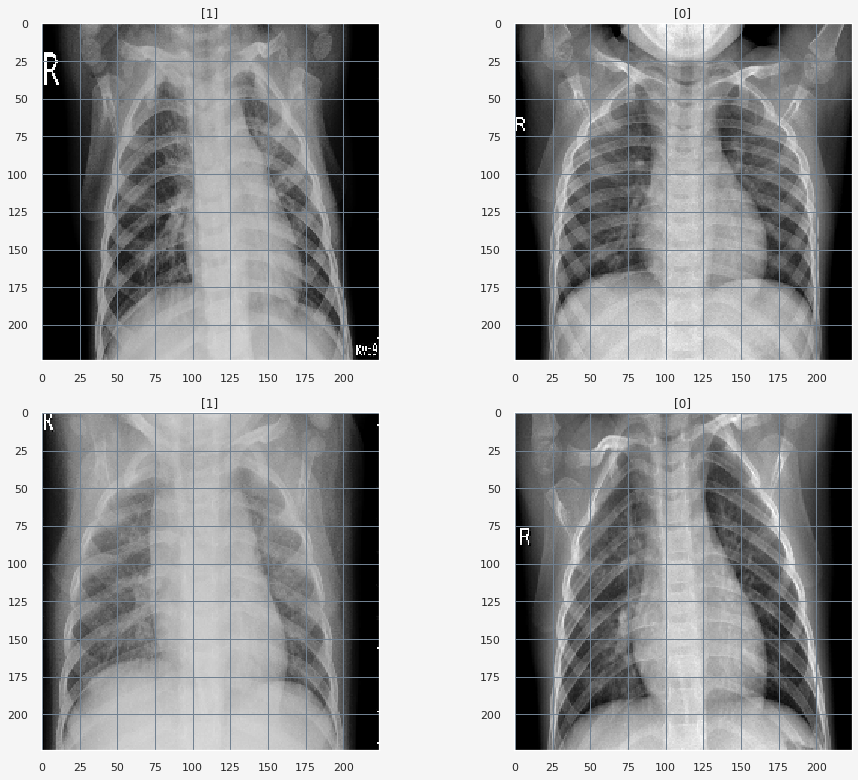

In [15]:
plt.subplot(2, 2, 1)
plt.imshow(train_feature[20], cmap = plt.cm.gray)
plt.title(train_target[20])
plt.subplot(2, 2, 2)
plt.imshow(train_feature[4932], cmap = plt.cm.gray)
plt.title(train_target[4932])
plt.subplot(2, 2, 3)
plt.imshow(val_feature[7], cmap = plt.cm.gray)
plt.title(val_target[7])
plt.subplot(2, 2, 4)
plt.imshow(test_feature[623], cmap = plt.cm.gray)
plt.title(test_target[623])

plt.tight_layout()
plt.show()

## Reshape and Randomize the data

In [0]:
train_feature = train_feature.reshape((-1, image_size, image_size, 1))
val_feature = val_feature.reshape((-1, image_size, image_size, 1))
test_feature = test_feature.reshape((-1, image_size, image_size, 1))

In [0]:
idx = np.random.permutation(len(train_target))

train_feature, train_target = train_feature[idx], train_target[idx]

## Train Convolutional Neural Network (CNN) Model

In [18]:
# Set the input and output sizes
output_size = 1

# Filters
filters_128 = 128
filters_256 = 256
filters_512 = 512

# Kernel Size
kernel_size = (3, 3)

# Input Shape
input_shape = (image_size, image_size, 1)

# Pool Size
pool_size = (2, 2)

# Useing same hidden layer size for all hidden layers.
hidden_layer_size = 256

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=filters_256, kernel_size=kernel_size, padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=pool_size, padding='valid'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=filters_256, kernel_size=kernel_size, padding='same', activation='relu',),
    tf.keras.layers.MaxPooling2D(pool_size=pool_size, padding='valid'),
    tf.keras.layers.Conv2D(filters=filters_128, kernel_size=kernel_size, padding='same', activation='relu',),
    tf.keras.layers.MaxPooling2D(pool_size=pool_size, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='sigmoid'),
    ])

# Choose the optimizer, the loss function and the metrics
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 256)     590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [19]:
# Set a maximum number of training epochs
# max_epochs = 100
max_epochs = 25

# Set the batch size
batch_size = 50

# Set an early stopping mechanism
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
        patience=3, verbose=0, mode='auto')
model_checkpoint_save = \
    tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5'
        , monitor='val_loss', save_best_only=True, mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='min',
    )

# Fit the model
history = model.fit(
    train_feature,
    train_target,
    batch_size=batch_size,
    epochs=max_epochs,
    #callbacks=[early_stopping, model_checkpoint_save, reduce_lr_loss],
    callbacks=[early_stopping],
    validation_data=(val_feature, val_target),
    verbose=2,
    )

Train on 4933 samples, validate on 16 samples
Epoch 1/25
4933/4933 - 107s - loss: 0.2917 - accuracy: 0.8757 - val_loss: 0.6245 - val_accuracy: 0.8125
Epoch 2/25
4933/4933 - 92s - loss: 0.1023 - accuracy: 0.9649 - val_loss: 0.6566 - val_accuracy: 0.7500
Epoch 3/25
4933/4933 - 92s - loss: 0.0690 - accuracy: 0.9743 - val_loss: 0.4065 - val_accuracy: 0.8125
Epoch 4/25
4933/4933 - 92s - loss: 0.0618 - accuracy: 0.9753 - val_loss: 0.0566 - val_accuracy: 1.0000
Epoch 5/25
4933/4933 - 92s - loss: 0.0410 - accuracy: 0.9848 - val_loss: 0.5332 - val_accuracy: 0.8750
Epoch 6/25
4933/4933 - 91s - loss: 0.0487 - accuracy: 0.9822 - val_loss: 0.9123 - val_accuracy: 0.8125
Epoch 7/25
4933/4933 - 91s - loss: 0.0289 - accuracy: 0.9882 - val_loss: 0.7607 - val_accuracy: 0.8125


## Plot Model Performances

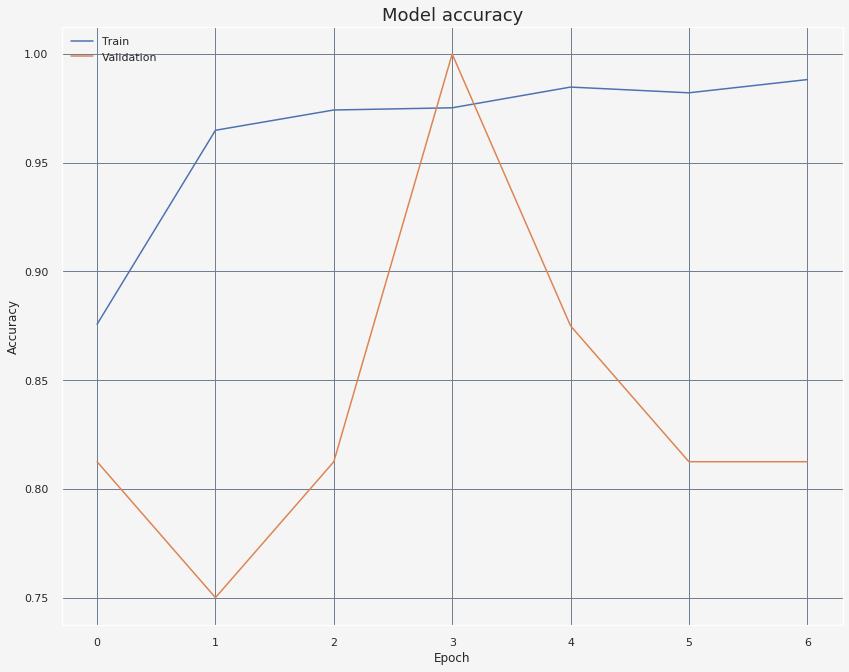

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=18)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

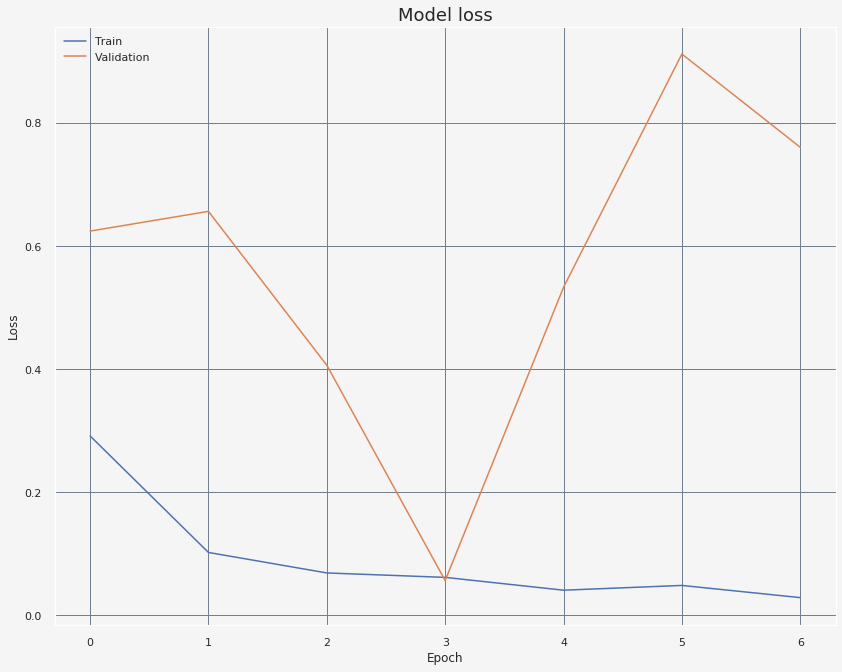

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=18)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

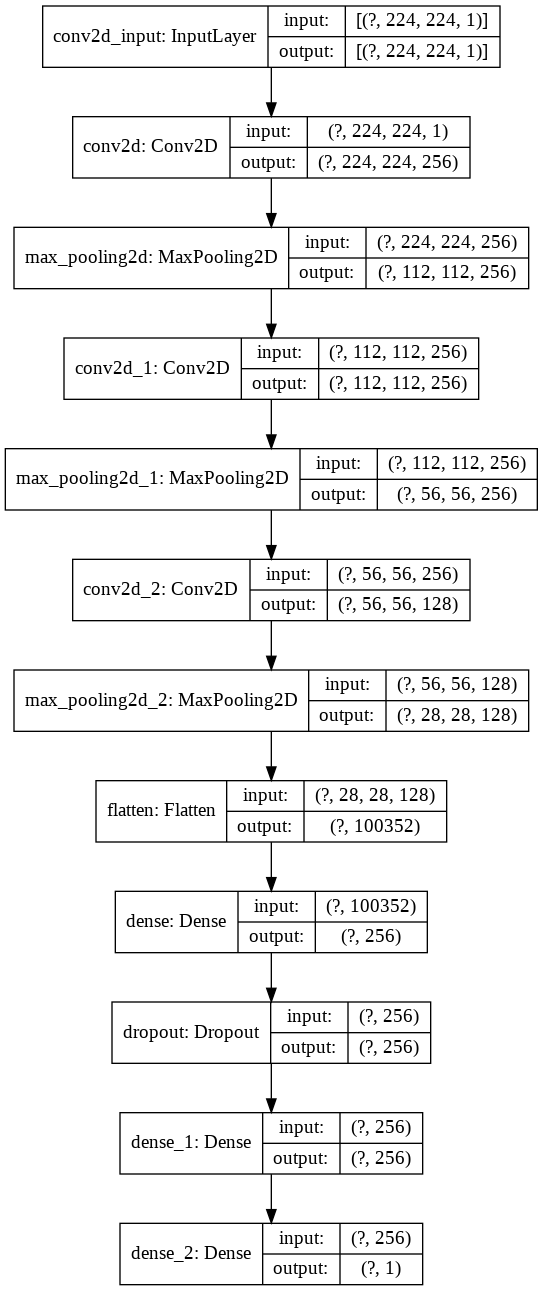

In [22]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96
)

## Calculate Accuracy on Test Data

In [23]:
test_loss, test_accuracy = model.evaluate(test_feature, test_target, verbose = 0)

print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100.0))


Test loss: 1.69. Test accuracy: 71.63%


## Predicting Test Data

In [0]:
predictions = model.predict_classes(test_feature)

In [25]:
predictions.shape, test_target.shape

((624, 1), (624, 1))

In [26]:
print(classification_report(test_target[:, -1], predictions[:, -1]))

              precision    recall  f1-score   support

           0       0.98      0.25      0.40       234
           1       0.69      1.00      0.81       390

    accuracy                           0.72       624
   macro avg       0.84      0.62      0.61       624
weighted avg       0.80      0.72      0.66       624



In [27]:
print(confusion_matrix(test_target[:, -1], predictions[:, -1]))

[[ 58 176]
 [  1 389]]


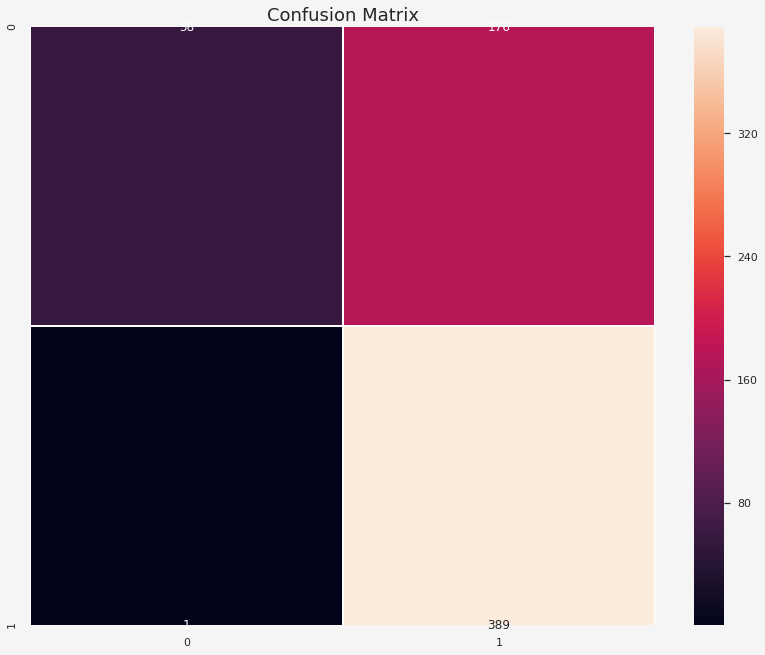

In [28]:
sns.heatmap(confusion_matrix(test_target[:, -1], predictions[:, -1]), annot=True, fmt="d", linewidths=0.75)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()